In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from struct_data import struct_data

csv_f_name = "../../data/sensortest/data_martin_sensortest.csv"
annot_f_name = "../../data/annotation/martin_sensortest.txt"

POSE_MAP= {
    "rett": 0,
    "fram": 1,
    "fram-hoyre": 2,
    "hoyre": 3,
    "bak-hoyre": 4,
    "bak": 5,
    "bak-venstre": 6,
    "venstre": 7,
    "fram-venstre": 8
}

knn_train = struct_data(csv_f_name, annot_f_name, POSE_MAP)

In [2]:
df_train = knn_train.df

knn_train.split_mult_sensor_data(3)
offsets = knn_train.fix_offsets()
#print(offsets)
#print(knn_train.df_arr[0])
#print(knn_train.df_arr[1])

df_train_id1 = knn_train.df_arr[0]
df_train_id2 = knn_train.df_arr[1]
df_train_id3 = knn_train.df_arr[2]

df_train_id2 = df_train_id2.iloc[:len(df_train_id1)]
df_train_id3 = df_train_id3.iloc[:len(df_train_id1)]


#df_train_id1 = df_train[df_train['SensorId']==1]
#df_train_id2 = df_train[df_train['SensorId']==2]
#df_train_id3 = df_train[df_train['SensorId']==3]

#timestamp_offset_1 = df_train_id1[' TimeStamp (s)'].iloc[0]
#df_train_id1[' TimeStamp (s)'] = df_train_id1[' TimeStamp (s)'] - timestamp_offset_1

#timestamp_offset_2 = df_train_id2[' TimeStamp (s)'].iloc[0]
#df_train_id2[' TimeStamp (s)'] = round(df_train_id2[' TimeStamp (s)'] - timestamp_offset_2, 2)

#timestamp_offset_3 = df_train_id3[' TimeStamp (s)'].iloc[0]
#df_train_id3[' TimeStamp (s)'] = round(df_train_id3[' TimeStamp (s)'] - timestamp_offset_3, 2)

#knn_train.split_mult_sensor_data(2)
#df_train_id1 = knn_train.df_arr[0]
#df_train_id1




1
2
3


"\ndf_train_id1 = df_train[df_train['SensorId']==1]\ndf_train_id2 = df_train[df_train['SensorId']==2]\ndf_train_id3 = df_train[df_train['SensorId']==3]\n\ntimestamp_offset_1 = df_train_id1[' TimeStamp (s)'].iloc[0]\ndf_train_id1[' TimeStamp (s)'] = df_train_id1[' TimeStamp (s)'] - timestamp_offset_1\n\ntimestamp_offset_2 = df_train_id2[' TimeStamp (s)'].iloc[0]\ndf_train_id2[' TimeStamp (s)'] = round(df_train_id2[' TimeStamp (s)'] - timestamp_offset_2, 2)\n\ntimestamp_offset_3 = df_train_id3[' TimeStamp (s)'].iloc[0]\ndf_train_id3[' TimeStamp (s)'] = round(df_train_id3[' TimeStamp (s)'] - timestamp_offset_3, 2)\n"

In [3]:
df_train_id1        

,SensorId,TimeStamp (s),FrameNumber,AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s),MagX (uT),...,QuatX,QuatY,QuatZ,LinAccX (g),LinAccY (g),LinAccZ (g),Pressure (kPa),Altitude (m),Temperature (degC),HeaveMotion (m)
2,1,0.00,0,0.019920,-0.794387,-0.601370,-1.562904,-1.464186,-0.498630,-10.045666,...,0.287525,-0.331934,-0.690842,-0.003905,0.005351,-0.012768,0.0,0.0,0.0,0.0
4,1,0.02,1,0.015635,-0.798804,-0.605099,-1.746947,-0.781661,-0.552266,-10.487769,...,0.287300,-0.331765,-0.691035,0.000312,0.010096,-0.009462,0.0,0.0,0.0,0.0
6,1,0.04,2,0.015153,-0.801027,-0.604974,-0.723603,0.261424,-0.555029,-10.635139,...,0.287496,-0.331762,-0.691037,0.000915,0.012586,-0.009926,0.0,0.0,0.0,0.0
7,1,0.06,3,0.020163,-0.797502,-0.608591,-0.445173,0.111246,-0.923887,-10.605668,...,0.287511,-0.331654,-0.691155,-0.003698,0.008849,-0.006028,0.0,0.0,0.0,0.0
9,1,0.08,4,0.026463,-0.787940,-0.609870,-0.919388,-0.897010,-0.986847,-10.664613,...,0.287353,-0.331585,-0.691356,-0.009806,-0.000566,-0.004931,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162283,1,1082.08,54073,-0.702289,-0.091232,-0.677052,0.771323,-2.120086,2.219131,-40.315224,...,-0.361369,-0.163922,-0.874499,-0.020885,0.005850,-0.008317,0.0,0.0,0.0,0.0
162285,1,1082.10,54074,-0.699011,-0.088285,-0.671266,-0.186748,-1.807720,4.439038,-40.433117,...,-0.361731,-0.163709,-0.874202,-0.024723,0.003658,-0.013604,0.0,0.0,0.0,0.0
162288,1,1082.12,54075,-0.723239,-0.084772,-0.665240,0.148049,-2.638496,3.695276,-40.786804,...,-0.362251,-0.163643,-0.873851,-0.001055,0.001250,-0.019174,0.0,0.0,0.0,0.0
162290,1,1082.14,54076,-0.722882,-0.090453,-0.662082,-0.800669,-4.035131,1.457107,-40.433117,...,-0.362930,-0.163697,-0.873551,-0.002378,0.007560,-0.021385,0.0,0.0,0.0,0.0


In [4]:
df_train_id2

,SensorId,TimeStamp (s),FrameNumber,AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s),MagX (uT),...,QuatX,QuatY,QuatZ,LinAccX (g),LinAccY (g),LinAccZ (g),Pressure (kPa),Altitude (m),Temperature (degC),HeaveMotion (m)
0,2,0.0000,0,-0.018429,-1.007040,0.044179,0.208760,-0.333792,-0.106727,-7.916889,...,-0.710777,0.131325,0.112130,-0.001296,0.008242,0.000691,0.0,0.0,0.0,0.0
1,2,0.0200,1,-0.017634,-1.007730,0.044718,0.280394,-0.513321,-0.113335,-7.479838,...,-0.710801,0.131377,0.112202,-0.002040,0.008935,0.000229,0.0,0.0,0.0,0.0
3,2,0.0400,2,-0.018090,-1.006988,0.046217,0.371321,-0.647394,-0.031212,-8.237392,...,-0.710826,0.131435,0.112299,-0.001520,0.008196,-0.001172,0.0,0.0,0.0,0.0
5,2,0.0600,3,-0.019457,-1.006600,0.045179,0.219733,-0.575123,-0.063933,-7.538113,...,-0.710842,0.131499,0.112374,-0.000097,0.007810,-0.000040,0.0,0.0,0.0,0.0
10,2,0.0800,4,-0.016538,-1.007205,0.045190,0.024483,-0.530237,-0.057548,-7.975160,...,-0.710800,0.131486,0.112518,-0.002987,0.008417,-0.000003,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162275,2,1082.0599,54102,-0.415353,-0.882715,-0.245171,0.135965,-0.216546,0.385747,-27.059656,...,-0.505494,0.351826,0.125382,-0.005129,0.008113,0.003787,0.0,0.0,0.0,0.0
162279,2,1082.0800,54103,-0.418212,-0.877104,-0.245348,-0.747729,-0.106989,0.351344,-27.176203,...,-0.505324,0.351814,0.125414,-0.002385,0.002588,0.003854,0.0,0.0,0.0,0.0
162284,2,1082.1000,54104,-0.427194,-0.878183,-0.245728,-0.490932,-1.054495,0.310354,-27.642389,...,-0.505212,0.351981,0.125498,0.006496,0.003788,0.003968,0.0,0.0,0.0,0.0
162287,2,1082.1200,54105,-0.432531,-0.883794,-0.245130,-0.368395,-1.456273,0.348247,-27.467569,...,-0.505115,0.352201,0.125599,0.011612,0.009486,0.003441,0.0,0.0,0.0,0.0


In [6]:
df_train_id3

,SensorId,TimeStamp (s),FrameNumber,AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s),MagX (uT),...,QuatX,QuatY,QuatZ,LinAccX (g),LinAccY (g),LinAccZ (g),Pressure (kPa),Altitude (m),Temperature (degC),HeaveMotion (m)
8,3,0.0000,0,0.178735,-0.646012,-0.749958,-0.044000,-0.931717,-0.066404,-1.480040,...,-0.335055,0.135482,0.557184,-0.007847,-0.005971,0.011232,0.0,0.0,0.0,0.0
12,3,0.0200,1,0.185902,-0.639991,-0.750624,-0.144642,-0.592701,-0.242972,-2.180673,...,-0.334987,0.135538,0.557254,-0.015154,-0.011941,0.011821,0.0,0.0,0.0,0.0
13,3,0.0400,2,0.182424,-0.646425,-0.742790,0.222718,-0.502114,-0.428202,-2.239058,...,-0.335022,0.135195,0.557491,-0.011315,-0.005282,0.003873,0.0,0.0,0.0,0.0
14,3,0.0600,3,0.171828,-0.657475,-0.739467,0.770536,-0.000966,-0.823513,-2.151479,...,-0.335146,0.135219,0.557584,-0.000323,0.005833,0.000583,0.0,0.0,0.0,0.0
17,3,0.0800,4,0.169346,-0.661125,-0.744957,0.855195,-0.107750,-1.136161,-1.684391,...,-0.335222,0.135169,0.557759,0.002410,0.009329,0.006268,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162286,3,1082.1200,54106,-0.179242,0.320664,-0.917033,-3.597149,-2.507763,1.412042,-21.798374,...,0.189071,-0.024263,0.586753,-0.004030,0.004813,-0.010586,0.0,0.0,0.0,0.0
162289,3,1082.1400,54107,-0.184859,0.349018,-0.916661,-3.871470,-3.348325,0.634065,-21.331287,...,0.190020,-0.024288,0.586531,0.000662,-0.022210,-0.010306,0.0,0.0,0.0,0.0
162291,3,1082.1600,54108,-0.182133,0.349425,-0.919004,-3.411656,-1.894172,0.007679,-21.915150,...,0.190656,-0.024374,0.586461,-0.002883,-0.021271,-0.007324,0.0,0.0,0.0,0.0
162293,3,1082.1801,54109,-0.185974,0.327751,-0.917113,-1.297845,-0.789528,-0.356094,-21.623219,...,0.190873,-0.024223,0.586515,0.000550,0.001103,-0.008886,0.0,0.0,0.0,0.0


[[0.0, 123.8, 0], [128.72, 243.32, 1], [246.28, 363.32, 2], [369.6, 484.24, 3], [487.2, 603.6, 4], [608.48, 725.48, 5], [729.52, 844.76, 6], [849.44, 963.44, 7], [966.92, 1082.96, 8]]
195673
drops: 17765
195673
195673


<AxesSubplot:xlabel=' TimeStamp (s)', ylabel='Pose'>

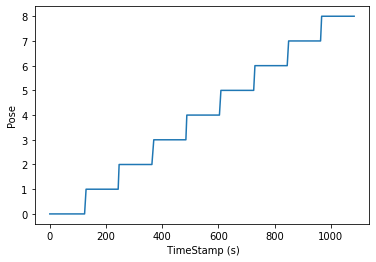

In [9]:
stamped_poses = knn_train.get_timestamp_and_pose()
print(stamped_poses)

df_train, df_stamped_poses = knn_train.align_poses(stamped_poses)

print(len(knn_train.df.index))
#print(len(df_stamped_poses))
y_train = knn_train.df["Pose"]
#df['Pose'].hist(bins=4)
sns.lineplot(data=df_train, x=" TimeStamp (s)", y='Pose')

<AxesSubplot:xlabel='SensorId', ylabel='Count'>

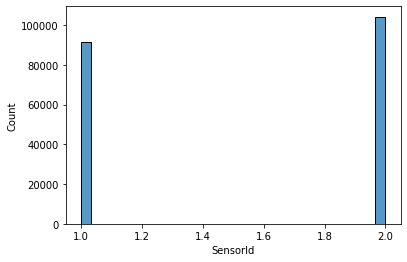

In [10]:
sns.histplot(data=df_train['SensorId'])

In [11]:
x_train = df_train.drop([' TimeStamp (s)'],axis=1)
x_train = x_train.drop(['Pose', ' MagX (uT)',' MagY (uT)',' MagZ (uT)', ' FrameNumber', ' LinAccX (g)', ' LinAccY (g)', ' LinAccZ (g)', ' Pressure (kPa)',' Altitude (m)', ' Temperature (degC)', ' HeaveMotion (m)'],axis=1)
# x_train[x_train['SensorId'] == 1]
x_train

,SensorId,AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s),EulerX (deg),EulerY (deg),EulerZ (deg),QuatW,QuatX,QuatY,QuatZ
0,2,-0.038330,-1.009899,0.014981,-0.020407,0.121994,0.009466,90.797035,-2.172571,91.873466,0.478540,-0.504644,-0.502279,-0.513858
1,2,-0.037530,-1.010232,0.012783,-0.074014,0.084961,0.045757,90.796272,-2.173043,91.874306,0.478537,-0.504639,-0.502277,-0.513867
2,2,-0.038469,-1.008746,0.013279,-0.020162,0.016839,0.011827,90.796051,-2.173169,91.874474,0.478537,-0.504638,-0.502277,-0.513869
3,1,0.043122,-0.787445,-0.615191,0.273525,0.281865,0.126697,51.475594,2.842351,67.997047,0.752595,-0.347415,-0.261269,-0.494613
4,2,-0.037840,-1.010549,0.013716,-0.020298,-0.001596,0.029728,90.795845,-2.173470,91.874458,0.478536,-0.504639,-0.502274,-0.513871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213420,1,-0.729275,-0.408668,-0.519516,0.473171,-0.669001,0.180679,37.711689,-48.122597,58.448025,0.689789,-0.445918,0.192645,-0.536876
213421,1,-0.727673,-0.406786,-0.521677,-0.022571,-0.784094,0.012910,37.716698,-48.128872,58.440990,0.689777,-0.445953,0.192694,-0.536846
213428,1,-0.729399,-0.406355,-0.523315,-0.469590,-0.993695,0.318943,37.715969,-48.138680,58.435657,0.689763,-0.445966,0.192788,-0.536818
213432,1,-0.729151,-0.405238,-0.522916,0.098314,-0.943940,0.400096,37.719868,-48.148590,58.431744,0.689725,-0.446010,0.192856,-0.536807


In [12]:
print(y_train)
print(len(y_train))

0         0
1         0
2         0
3         0
4         0
         ..
213420    8
213421    8
213428    8
213432    8
213435    8
Name: Pose, Length: 195673, dtype: int64
195673


In [13]:
"""
csv_file = "../../data/test_data/Simon_test_1.csv"
annot_file = "../../data/annotation/Simon_test_1.txt"
"""
csv_file = "../../data/test_data/martin_test_2sensorer.csv"
annot_file = "../../data/annotation/martin_test_2_sensor.txt"


knn_test = struct_data(csv_file, annot_file, POSE_MAP)
s_poses = knn_test.get_timestamp_and_pose()
print(s_poses)
df_test, df_stamped_poses = knn_test.align_poses(s_poses)

y_test = df_stamped_poses #df_test["Pose"]

[[0.0, 9.12, 0], [11.36, 19.0, 1], [20.44, 29.2, 2], [31.08, 39.68, 3], [41.08, 48.96, 4], [51.24, 59.68, 5], [61.84, 69.32, 6], [70.92, 78.92, 7], [81.08, 89.6, 8]]
9052
drops: 7910
9052


<AxesSubplot:xlabel='SensorId', ylabel='Count'>

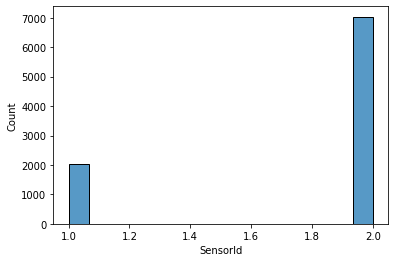

In [14]:
sns.histplot(data=df_test['SensorId'])

In [15]:
x_test = df_test.drop([' TimeStamp (s)'],axis=1)
#x_test = x_test.drop(['Pose'],axis=1)
x_test = x_test.drop(['Pose', ' FrameNumber', ' LinAccX (g)', ' LinAccY (g)', ' MagX (uT)',' MagY (uT)',' MagZ (uT)', ' LinAccZ (g)', ' Pressure (kPa)',' Altitude (m)', ' Temperature (degC)', ' HeaveMotion (m)'],axis=1)
x_test

,SensorId,AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s),EulerX (deg),EulerY (deg),EulerZ (deg),QuatW,QuatX,QuatY,QuatZ
0,2,0.007109,-1.009733,0.046817,-0.094905,-0.194240,-0.014444,92.724411,0.373840,154.059463,0.157189,-0.160240,-0.705754,-0.671957
1,1,0.024004,-0.869259,-0.489941,-0.193093,0.101639,-0.102167,60.998085,1.393590,10.323728,0.858635,-0.504485,-0.056094,-0.071369
2,2,0.007397,-1.009613,0.050505,-0.006339,-0.053765,-0.018406,92.734406,0.378434,154.058578,0.157209,-0.160233,-0.705817,-0.671888
3,2,0.007311,-1.009685,0.049407,-0.024512,-0.038113,0.016380,92.734161,0.378290,154.058197,0.157211,-0.160236,-0.705815,-0.671889
4,2,0.005642,-1.009328,0.048528,-0.095585,-0.055854,0.017424,92.733208,0.378143,154.057632,0.157214,-0.160239,-0.705808,-0.671894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16954,1,0.247442,-0.400292,-0.891841,-1.863137,-1.242446,2.743157,23.966084,14.554126,-174.287491,-0.022086,0.134016,-0.199519,-0.970435
16955,1,0.246253,-0.399815,-0.890919,-1.065990,-0.616369,2.861733,23.961557,14.536867,-174.263046,-0.022330,0.133912,-0.199464,-0.970455
16956,1,0.246998,-0.394692,-0.888392,-0.447510,0.465747,2.954196,23.964575,14.529125,-174.233215,-0.022594,0.133899,-0.199460,-0.970452
16957,1,0.247528,-0.387826,-0.890107,-0.625769,0.977093,2.874380,23.966148,14.526376,-174.201965,-0.022862,0.133931,-0.199438,-0.970446


<AxesSubplot:xlabel='SensorId', ylabel='Count'>

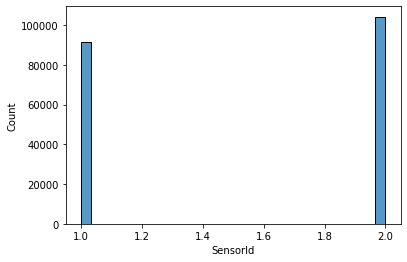

In [16]:
sns.histplot(x_train['SensorId'])

In [17]:
"""
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NeighborhoodComponentsAnalysis,KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

k = 1
accuracy_array = []
k_array = []

for num in range(20):
    
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train,y_train)
    predictions = neigh.predict(x_test)
    number_of_corrects = 0

    print(y_test[1200:1230])
   
    for n in range(len(predictions)):
        if(predictions[n] == y_test[n]):
            number_of_corrects += 1

    print("number of correct: {}".format(number_of_corrects))
    print("number of guesses: {}".format(len(predictions)))
    print("% correct: {}".format(number_of_corrects/len(predictions)*100))
    accuracy_array.append(number_of_corrects/len(predictions)*100)
    k_array.append(k)
    print("K: {}".format(k))
    k += 1
    print(accuracy_array)
    print(k_array)

resframe = pd.DataFrame({'k':k_array, '%':accuracy_array})
resframe
    

sns.lineplot(data=resframe,x="k",y="%")
"""


'\nfrom sklearn import svm\nfrom sklearn.pipeline import make_pipeline\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.neighbors import NeighborhoodComponentsAnalysis,KNeighborsClassifier\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.neighbors import KNeighborsClassifier\n\nk = 1\naccuracy_array = []\nk_array = []\n\nfor num in range(20):\n    \n    neigh = KNeighborsClassifier(n_neighbors=k)\n    neigh.fit(x_train,y_train)\n    predictions = neigh.predict(x_test)\n    number_of_corrects = 0\n\n    print(y_test[1200:1230])\n   \n    for n in range(len(predictions)):\n        if(predictions[n] == y_test[n]):\n            number_of_corrects += 1\n\n    print("number of correct: {}".format(number_of_corrects))\n    print("number of guesses: {}".format(len(predictions)))\n    print("% correct: {}".format(number_of_corrects/len(predictions)*100))\n    accuracy_array.append(number_of_corrects/len(predictions)*100)\n

In [18]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis,KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

#x_train = x_train.drop(['SensorId'], axis=1)
#x_test = x_test.drop(['SensorId'], axis=1)
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1))
#neigh = KNeighborsClassifier(n_neighbors=1)
pipe.fit(x_train,y_train)
predictions = pipe.predict(x_test)


(195673, 14)
(195673,)
(9052, 14)


In [19]:
x_test

,SensorId,AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s),EulerX (deg),EulerY (deg),EulerZ (deg),QuatW,QuatX,QuatY,QuatZ
0,2,0.007109,-1.009733,0.046817,-0.094905,-0.194240,-0.014444,92.724411,0.373840,154.059463,0.157189,-0.160240,-0.705754,-0.671957
1,1,0.024004,-0.869259,-0.489941,-0.193093,0.101639,-0.102167,60.998085,1.393590,10.323728,0.858635,-0.504485,-0.056094,-0.071369
2,2,0.007397,-1.009613,0.050505,-0.006339,-0.053765,-0.018406,92.734406,0.378434,154.058578,0.157209,-0.160233,-0.705817,-0.671888
3,2,0.007311,-1.009685,0.049407,-0.024512,-0.038113,0.016380,92.734161,0.378290,154.058197,0.157211,-0.160236,-0.705815,-0.671889
4,2,0.005642,-1.009328,0.048528,-0.095585,-0.055854,0.017424,92.733208,0.378143,154.057632,0.157214,-0.160239,-0.705808,-0.671894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16954,1,0.247442,-0.400292,-0.891841,-1.863137,-1.242446,2.743157,23.966084,14.554126,-174.287491,-0.022086,0.134016,-0.199519,-0.970435
16955,1,0.246253,-0.399815,-0.890919,-1.065990,-0.616369,2.861733,23.961557,14.536867,-174.263046,-0.022330,0.133912,-0.199464,-0.970455
16956,1,0.246998,-0.394692,-0.888392,-0.447510,0.465747,2.954196,23.964575,14.529125,-174.233215,-0.022594,0.133899,-0.199460,-0.970452
16957,1,0.247528,-0.387826,-0.890107,-0.625769,0.977093,2.874380,23.966148,14.526376,-174.201965,-0.022862,0.133931,-0.199438,-0.970446


In [20]:
"""
for num in range(len(predictions)):
    print(predictions[num])
"""

'\nfor num in range(len(predictions)):\n    print(predictions[num])\n'

<AxesSubplot:xlabel='x', ylabel='y'>

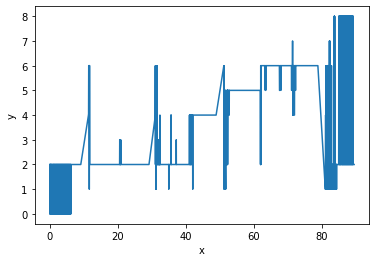

In [21]:
df_predict = pd.DataFrame({'x':df_test[' TimeStamp (s)'],'y':predictions})
sns.lineplot(data=df_predict,x='x',y='y')

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions, zero_division=True))

[[620   0 892   0   0   0   0   0   0]
 [  0   1 425   0   7   0  30   0   0]
 [  0   0 970  29   0   0   0   0   0]
 [  0   3 926  18  17   0  36   0   0]
 [  0   3  81   2 762   0   0   0   0]
 [  0  37 110   2  56 745   5   0   0]
 [  0   0   5   0   0  42 695   0   0]
 [  0   0   0   0  15  19 826   5   0]
 [  0 311 752   0   2   0 159   7 437]]
              precision    recall  f1-score   support

           0       1.00      0.41      0.58      1512
           1       0.00      0.00      0.00       463
           2       0.23      0.97      0.38       999
           3       0.35      0.02      0.03      1000
           4       0.89      0.90      0.89       848
           5       0.92      0.78      0.85       955
           6       0.40      0.94      0.56       742
           7       0.42      0.01      0.01       865
           8       1.00      0.26      0.42      1668

    accuracy                           0.47      9052
   macro avg       0.58      0.48      0.41      905

<AxesSubplot:>

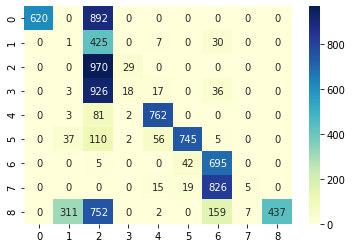

In [23]:
sns.heatmap(confusion_matrix(y_test, predictions), cmap="YlGnBu", annot=True, fmt="d")

In [24]:
number_of_corrects = 0
for num in range(len(predictions)):
    if(predictions[num] == y_test[num]):
        number_of_corrects += 1

print("number of correct: {}".format(number_of_corrects))
print("number of guesses: {}".format(len(predictions)))
print("% correct: {}".format(number_of_corrects/len(predictions)*100))

number of correct: 4253
number of guesses: 9052
% correct: 46.98409191338931
